# Práctico entregable: Aprendizaje No Supervisado

Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

In [99]:
# Declaramos las librearias que vamos a utilizar
from plotly.offline import init_notebook_mode, plot,iplot

import pandas as pd
import numpy as np
import plotly.graph_objs as go

init_notebook_mode(connected=True)

import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

import missingno as msno
import matplotlib.pyplot as plt

In [100]:
# Leemos el dataframe
df = pd.read_csv("female_players.csv", comment="#")
df

/tmp/ipykernel_9816/1720056745.py:2: DtypeWarning:

Columns (17,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.



player_id                                  player_url  fifa_version  \
0          227125              /player/227125/sam-kerr/230009            23   
1          227316         /player/227316/wendie-renard/230009            23   
2          226301           /player/226301/alex-morgan/230009            23   
3          227310         /player/227310/ada-hegerberg/230009            23   
4          227246           /player/227246/lucy-bronze/230009            23   
...           ...                                         ...           ...   
181356     227385          /player/227385/nkem-ezurike/160001            16   
181357     227485       /player/227485/valeria-miranda/160001            16   
181358     228160  /player/228160/linda-tucceri-cimini/160001            16   
181359     228723        /player/228723/fabiola-ibarra/160001            16   
181360     228955        /player/228955/anisa-guajardo/160001            16   

        fifa_update fifa_update_date         short_name  \
0                 9       2023-01-13            S. Kerr   
1                 9       2023-01-13          W. Renard   
2                 9       2023-01-13          A. Morgan   
3                 9       2023-01-13       A. Hegerberg   
4                 9       2023-01-13          L. Bronze   
...             ...              ...                ...   
181356            1       2015-08-28         N. Ezurike   
181357            1       2015-08-28         V. Miranda   
181358            1       2015-08-28  L. Tucceri Cimini   
181359            1       2015-08-28          F. Ibarra   
181360            1       2015-08-28        A. Guajardo   

                               long_name player_positions  overall  potential  \
0                      Samantha May Kerr               ST       91         91   
1              Wéndèleine Thérèse Renard               CB       91         91   
2              Alexandra Morgan Carrasco               ST       90         90   
3          Ada Martine Stolsmo Hegerberg               ST       90         91   
4             Lucia Roberta Tough Bronze               RB       89         89   
...                                  ...              ...      ...        ...   
181356                      Nkem Ezurike               ST       64         71   
181357  Valeria Aurora Miranda Rodriguez               LB       64         72   
181358              Linda Tucceri Cimini           LB, CB       64         71   
181359       Claudia Fabiola Ibarra Muro               LM       63         68   
181360       Anisa Raquel Guajardo Braff               ST       61         66   

        ...   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  \
0       ...  62+3  62+3  64+3  61+3  58+3  58+3  58+3  61+3  20+3   
1       ...  87+3  87+3  80+3  82+3    91    91    91  82+3  21+3   
2       ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3       ...  61+3  61+3  63+3  60+3  56+3  56+3  56+3  60+3  20+3   
4       ...  86+3  86+3  87+2  87+2  87+2  87+2  87+2  87+2  20+3   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
181356  ...    41    41    44    41    37    37    37    41    19   
181357  ...    60    60    62    64    65    65    65    64    17   
181358  ...    64    64    62    64    68    68    68    64    16   
181359  ...    43    43    48    45    36    36    36    45    14   
181360  ...    42    42    42    41    42    42    42    41    16   

                                          player_face_url  
0       https://cdn.sofifa.net/players/227/125/23_120.png  
1       https://cdn.sofifa.net/players/227/316/23_120.png  
2                                                     NaN  
3       https://cdn.sofifa.net/players/227/310/23_120.png  
4       https://cdn.sofifa.net/players/227/246/23_120.png  
...                                                   ...  
181356  https://cdn.sofifa.net/players/227/385/16_120.png  
181357  https://cdn.sofifa.net/players/227/485/16_120.png  
181358  

In [101]:
# Aqui nos fijamos los nombres de las columnas que contiene el dataframe
df.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [102]:
# Aqui mostramos cuales son las columnas donde se muestran las habilidades de los jugadores 
# (Todas variables numericas)
# Para determinar cuales eran tuviemos que ver toda la base, columna por columna
df.iloc[:,[5, 6, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 
           53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 
           67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]]

short_name                         long_name  pace  shooting  \
0                 S. Kerr                 Samantha May Kerr  87.0      91.0   
1               W. Renard         Wéndèleine Thérèse Renard  63.0      72.0   
2               A. Morgan         Alexandra Morgan Carrasco   NaN       NaN   
3            A. Hegerberg     Ada Martine Stolsmo Hegerberg  83.0      91.0   
4               L. Bronze        Lucia Roberta Tough Bronze  85.0      77.0   
...                   ...                               ...   ...       ...   
181356         N. Ezurike                      Nkem Ezurike  67.0      60.0   
181357         V. Miranda  Valeria Aurora Miranda Rodriguez  62.0      31.0   
181358  L. Tucceri Cimini              Linda Tucceri Cimini  64.0      39.0   
181359          F. Ibarra       Claudia Fabiola Ibarra Muro  78.0      60.0   
181360        A. Guajardo       Anisa Raquel Guajardo Braff  60.0      63.0   

        passing  dribbling  defending  physic  attacking_crossing  \
0          74.0       90.0       42.0    83.0                70.0   
1          71.0       72.0       93.0    87.0                51.0   
2           NaN        NaN        NaN     NaN                 NaN   
3          77.0       87.0       39.0    77.0                71.0   
4          82.0       83.0       88.0    89.0                87.0   
...         ...        ...        ...     ...                 ...   
181356     51.0       63.0       20.0    67.0                49.0   
181357     44.0       48.0       64.0    73.0                55.0   
181358     51.0       48.0       69.0    68.0                43.0   
181359     57.0       61.0       25.0    48.0                62.0   
181360     46.0       61.0       29.0    63.0                35.0   

        attacking_finishing  ...  mentality_composure  \
0                      93.0  ...                 92.0   
1                      70.0  ...                 84.0   
2                       NaN  ...                  NaN   
3                      94.0  ...                 86.0   
4                      73.0  ...                 86.0   
...                     ...  ...                  ...   
181356                 69.0  ...                  NaN   
181357                 23.0  ...                  NaN   
181358                 30.0  ...                  NaN   
181359                 62.0  ...                  NaN   
181360                 65.0  ...                  NaN   

        defending_marking_awareness  defending_standing_tackle  \
0                              44.0                       39.0   
1                              93.0                       94.0   
2                               NaN                        NaN   
3                              42.0                       33.0   
4                              89.0                       91.0   
...                             ...                        ...   
181356                         14.0                       12.0   
181357                         64.0                       60.0   
181358                         69.0                       73.0   
181359                         16.0                       22.0   
181360                         23.0                       24.0   

        defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                           30.0                 7.0                  12.0   
1                           91.0                 7.0                  14.0   
2                            NaN                 NaN                   NaN   
3                           30.0                15.0                   7.0   
4                           89.0                10.0                  14.0   
...                          ...                 ...                   ...   
181356                      18.0                13.0                  14.0   
181357                      73.0                12.0                   9.0   
181358                      70.0                11.0     

#### 1- Análisis exploratorio inicial de la base.

In [103]:
# Nuevamente nos fijamos el dataframe, que columnas tiene
df.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [104]:
# Extraemos los nombres de todas las columnas y los mostramos
columns_names = df.columns.values
columns_names

array(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       'height_cm', 'weight_kg', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
     

In [105]:
# Seleccionamos las habilidades que queremos analizar

skills_ratings = ['shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'goalkeeping_speed']

df_skills=df[skills_ratings]

<Axes: >

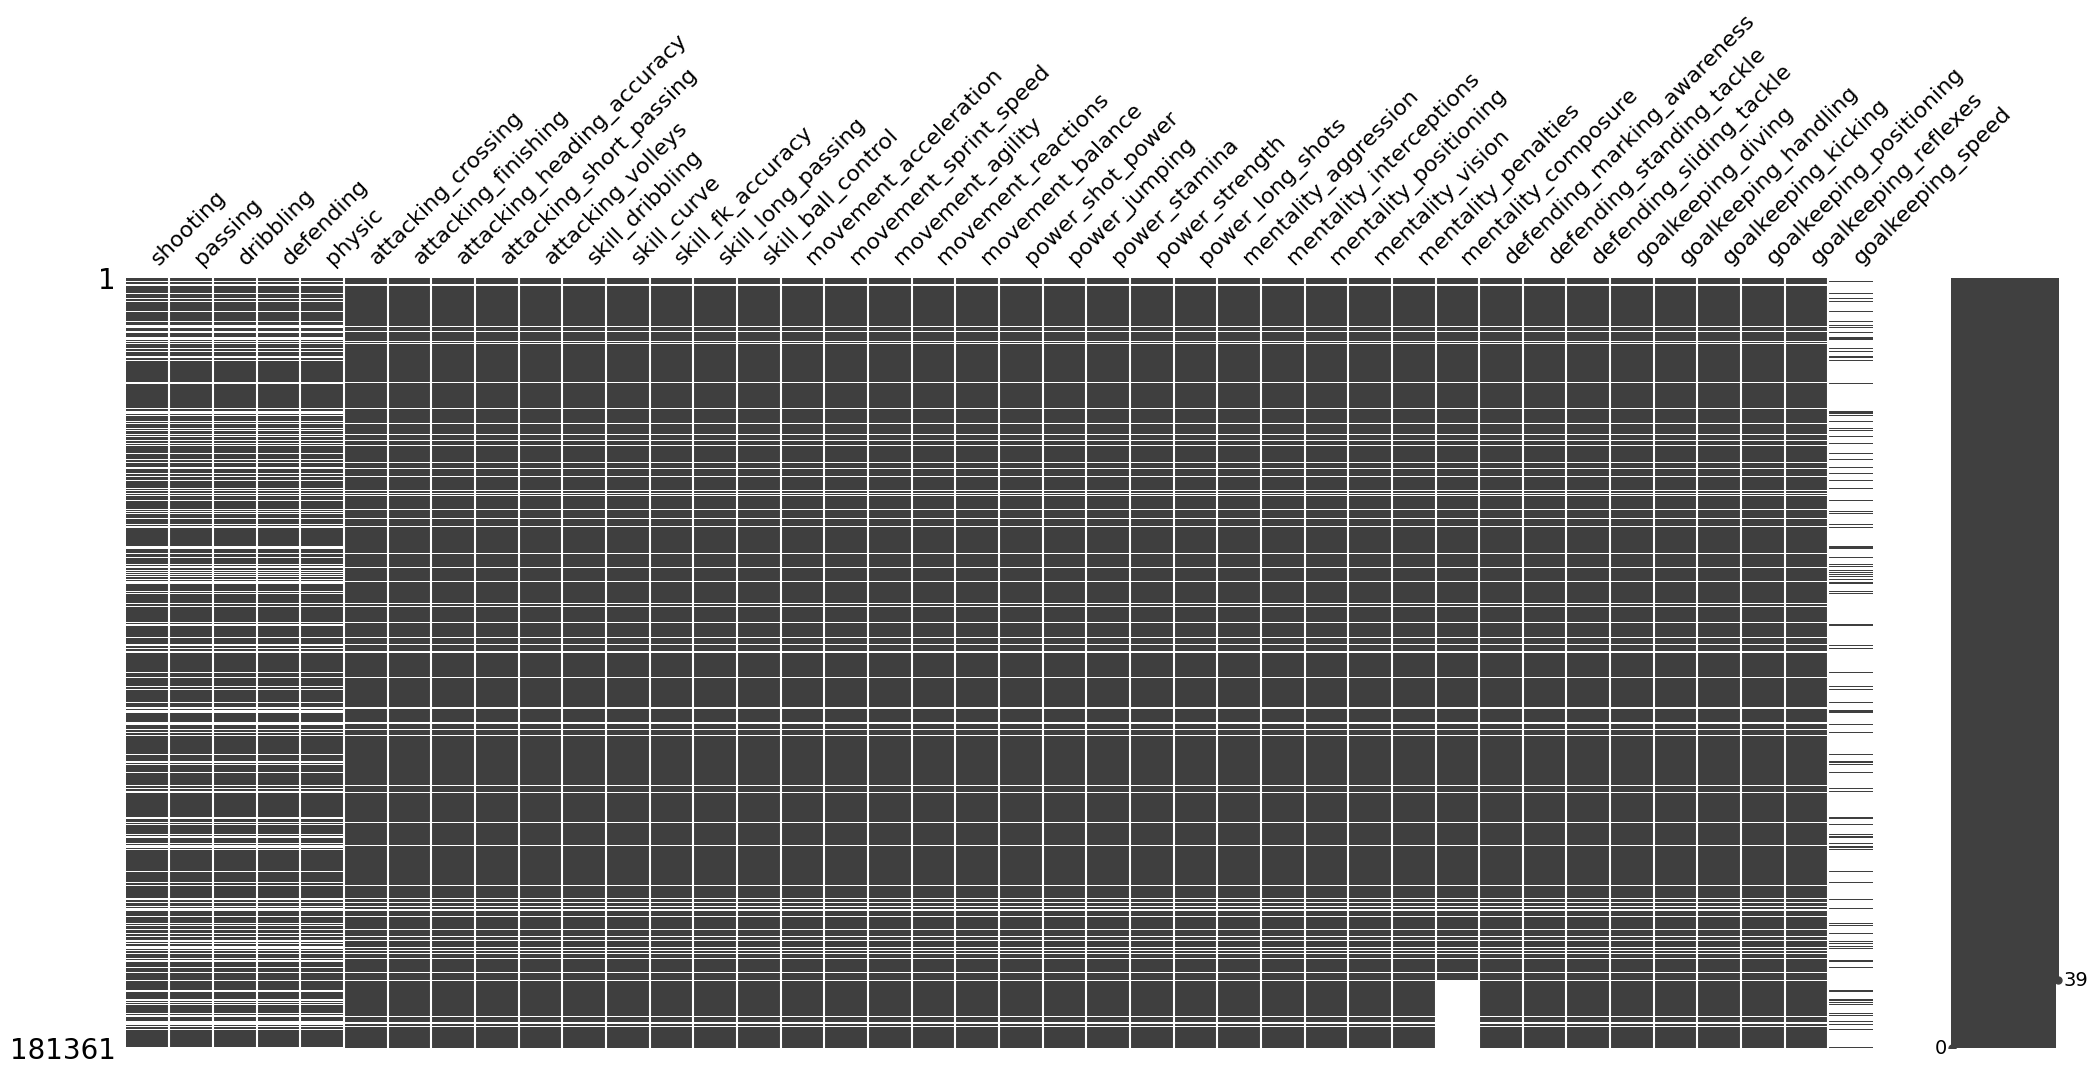

In [106]:
msno.matrix(df_skills)
#Como vemos muchas filas en blanco en la matriz de nans, vamos a eliminar todas las filas del dataframe que tengan nan en todas sus columnas, ya que a los efectos
#de nuestro análisis esas columnas son basura porque representan jugadoras de las cuales no tenemos ningún dato relevante.

<Axes: >

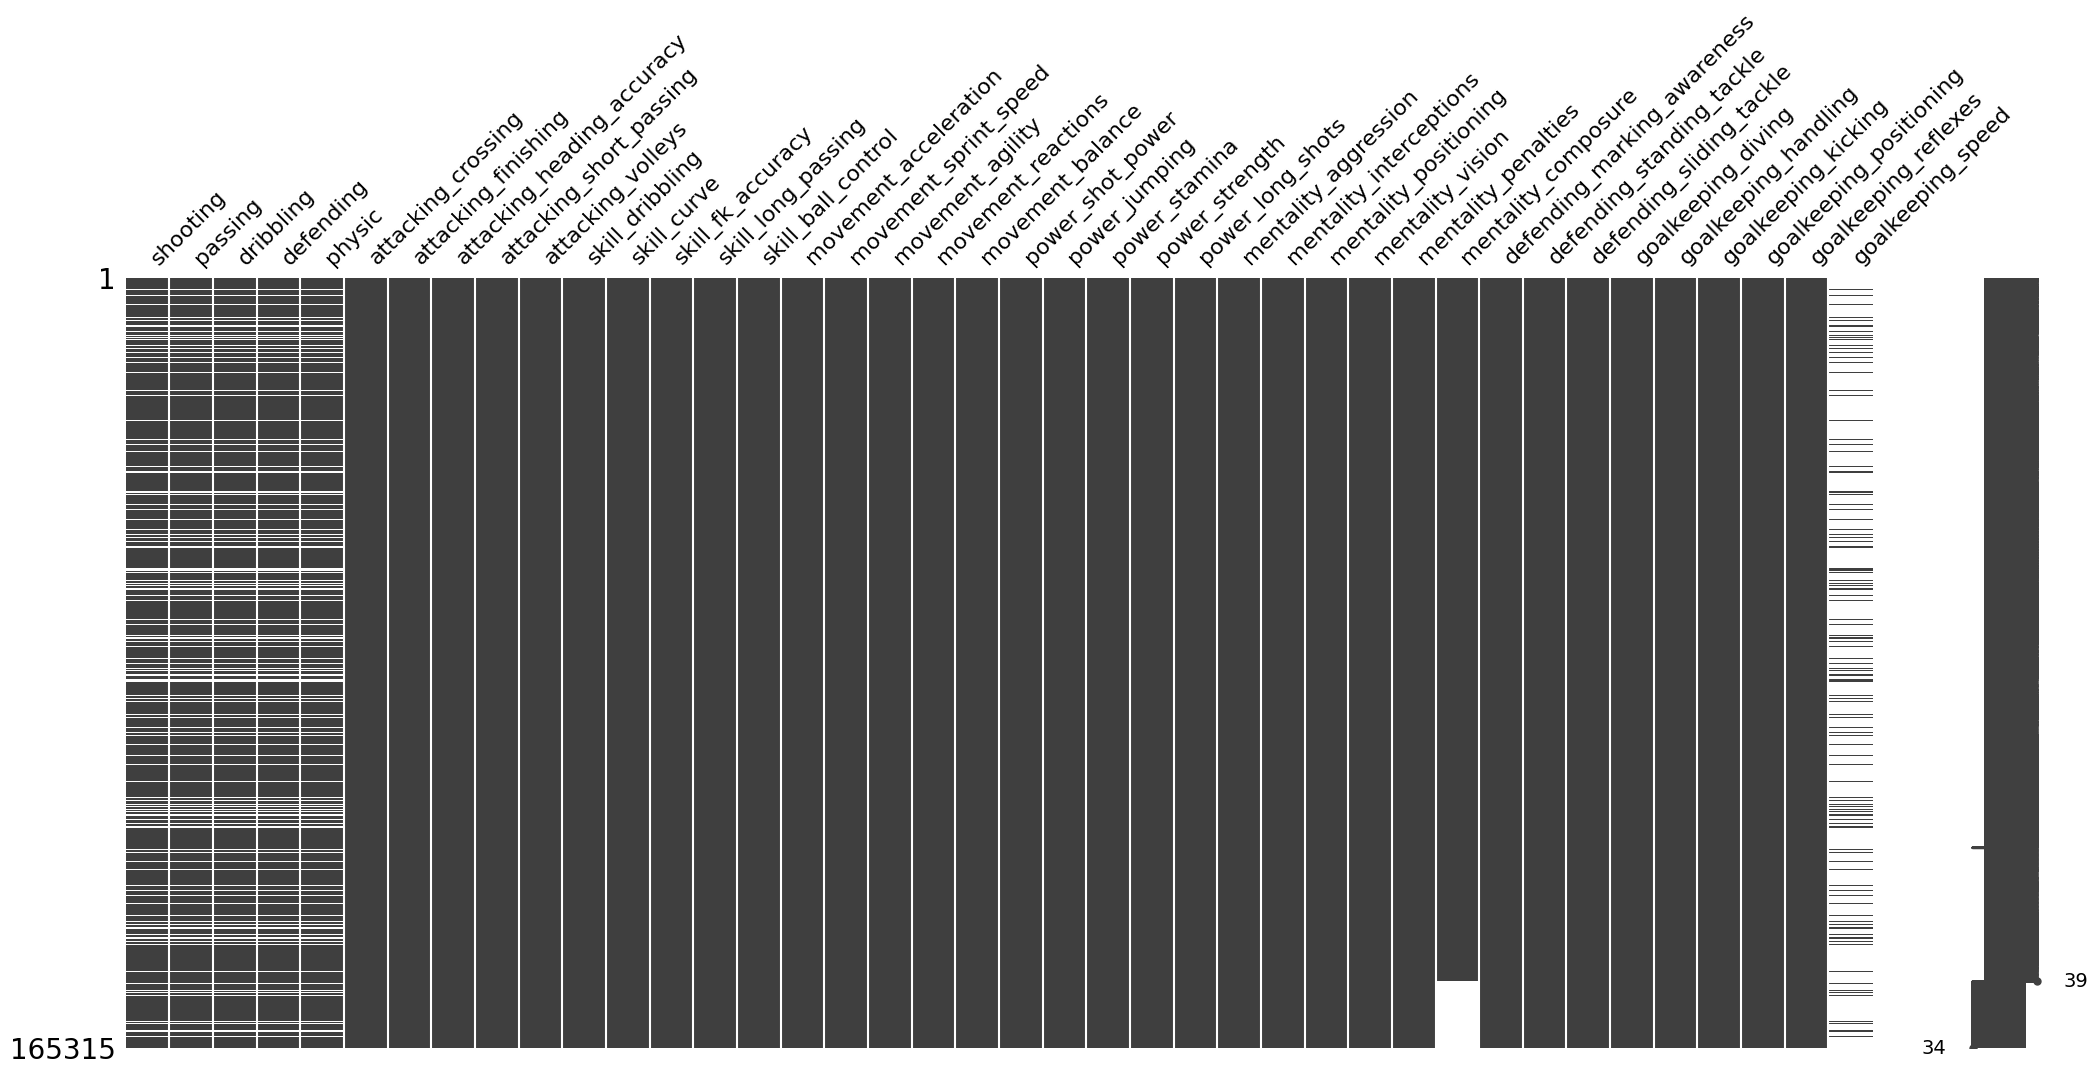

In [107]:
#Eliminar las filas que tienen nan en todas las columnas
df_skills2 = df_skills.dropna(how="all")

msno.matrix(df_skills2)

In [108]:
#Veamos cuáles columnas siguen teniendo nans
print(df_skills2.isna().sum())

shooting                        22741
passing                         22741
dribbling                       22741
defending                       22741
physic                          22741
attacking_crossing                  0
attacking_finishing                 0
attacking_heading_accuracy          0
attacking_short_passing             0
attacking_volleys                   0
skill_dribbling                     0
skill_curve                         0
skill_fk_accuracy                   0
skill_long_passing                  0
skill_ball_control                  0
movement_acceleration               0
movement_sprint_speed               0
movement_agility                    0
movement_reactions                  0
movement_balance                    0
power_shot_power                    0
power_jumping                       0
power_stamina                       0
power_strength                      0
power_long_shots                    0
mentality_aggression                0
mentality_in

In [109]:
#Notamos que las únicas columnas que tienen nans son las siguientes:
problematicas= ["shooting","passing","dribbling","defending","physic","mentality_composure","goalkeeping_speed"]

#Vamos a buscar, para cada una de estas columnas con nans, la columna que más correlacionada esté con ella, para ver si podemos prescindir de las columnas con nans.

for column in problematicas:
    corr_matrix = df_skills2.corr()[column]
    print (corr_matrix.sort_values(ascending=False).head(2))


shooting               1.000000
attacking_finishing    0.972986
Name: shooting, dtype: float64
passing                    1.000000
attacking_short_passing    0.845602
Name: passing, dtype: float64
dribbling          1.000000
skill_dribbling    0.971477
Name: dribbling, dtype: float64
defending                    1.000000
defending_standing_tackle    0.979827
Name: defending, dtype: float64
physic            1.000000
power_strength    0.886408
Name: physic, dtype: float64
mentality_composure    1.000000
skill_ball_control     0.740774
Name: mentality_composure, dtype: float64
goalkeeping_speed        1.000000
movement_sprint_speed    0.959267
Name: goalkeeping_speed, dtype: float64


Podemos ver que shooting está altamente correlacionada con **attacking_finishing**, que no tiene nans, por lo cual preferimos dejar ésta última.

Lo mismo con **dribbling, defending,y goalkeeping speed**. En éste último caso si bien goalkeeping speed puede no ser necesariamente equivalente a **movement_sprint_speed**, el hecho de que **goalkeeping_speed** tenga más de un 86% de valores faltantes hace que no tenga sentido intentar imputar esos valores.

Con respecto a la columna physic, consideramos que la correlación con **"power_strenght"** es suficiente tanto desde lo matemático como conceptualmente como para eliminar la columna.

Finalmente, aunque la columna **mentality_composture** no está tan fuertemente relacionada con ninguna otra, decidimos que, al tener otras 34 coplumnas, incluyendo 5 columnas de mentality, no es tanta la información que perdemos si sacamos también esa colum


In [110]:
df_skills2 = df_skills2.drop(columns=problematicas)


In [111]:
# Clonamos el dataframe
df_m= df.copy()

In [112]:
# Para comprender un poco mas la base (Media, desviacion estandar, etc)
print(df_m.describe())

           player_id   fifa_version    fifa_update        overall  \
count  181361.000000  181361.000000  181361.000000  181361.000000   
mean   234662.993907      19.223538      36.727703      76.269909   
std     10659.745380       2.060414      23.555409       5.709719   
min    226177.000000      16.000000       1.000000      49.000000   
25%    227117.000000      17.000000      16.000000      72.000000   
50%    227586.000000      19.000000      35.000000      76.000000   
75%    241226.000000      21.000000      54.000000      80.000000   
max    273050.000000      23.000000      99.000000      93.000000   

           potential     value_eur     wage_eur            age      height_cm  \
count  181361.000000  4.831000e+03  4831.000000  181361.000000  181361.000000   
mean       79.672967  1.668368e+07   818.505485      26.014099     168.756464   
std         5.422202  2.425583e+07   468.435485       3.907456       6.249204   
min        49.000000  3.250000e+05   500.000000      1

In [113]:
# Variable Overall (Es la varible mas importante, marca la calificación general)
print(df.overall)

0         91
1         91
2         90
3         90
4         89
          ..
181356    64
181357    64
181358    64
181359    63
181360    61
Name: overall, Length: 181361, dtype: int64


45
<bound method Series.median of 0         91
1         91
2         90
3         90
4         89
          ..
181356    64
181357    64
181358    64
181359    63
181360    61
Name: overall, Length: 181361, dtype: int64>
[91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68
 67 66 65 64 63 62 61 60 59 58 57 92 93 56 55 53 52 51 50 49]


<Axes: >

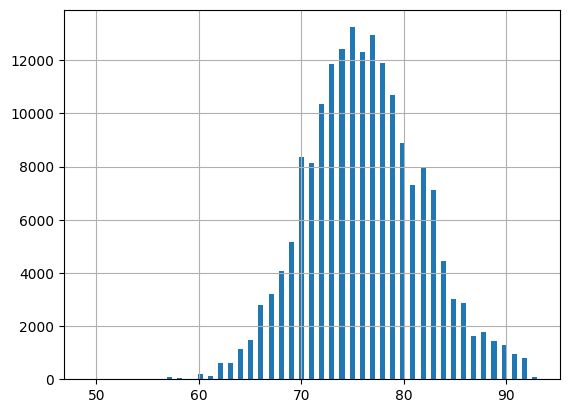

In [114]:
# Realizamos el histograma de la variable Overall
print(df.overall.max()-df.overall.min()+1)
print(df.overall.median)

# Aca definimos el numero de intervalos del histograma con la variable nbins
nbins=89

print(df['overall'].unique())

df['overall'].hist(bins = nbins)

In [115]:
#teniendo en cuenta que para la selección de jugadoras, las variables que se consideran más importantes para elegir son overall y position
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','long_name','overall']]
best_players_per_position

player_positions                      long_name  overall
138841              CAM           Daniëlle van de Donk       79
140770         CAM, CDM              Lina Maria Magull       78
1742        CAM, CF, LB  Crystal Alyssia Dunn Soubrier       83
2184        CAM, CF, RW                     Kit Graham       73
7430            CAM, CM             Dzsenifer Marozsán       90
...                 ...                            ...      ...
114000  ST, RW, LW, CAM                  Amy Rodriguez       77
82545   ST, RW, LW, LWB  Olivia Alma Charlotta Schough       77
84885    ST, RW, LW, RM        Nichelle Patrice Prince       73
142057       ST, RW, RB                 Josée Bélanger       77
80730        ST, RW, RM          Asisat Lamina Oshoala       80

[382 rows x 3 columns]

In [116]:
pd.DataFrame(df.player_positions.value_counts().sort_index())

count
player_positions       
CAM                1523
CAM, CDM             76
CAM, CF, LB           1
CAM, CF, RW           8
CAM, CM            3489
...                 ...
ST, RW, LW, CAM     215
ST, RW, LW, LWB      35
ST, RW, LW, RM       50
ST, RW, RB          274
ST, RW, RM           83

[382 rows x 1 columns]

#### 2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.

In [117]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall

club_name    overall
8                  England W  90.000000
12                 Germany W  84.500000
33           United States W  84.250000
29                   Spain W  83.333333
31                  Sweden W  81.600000
11                  France W  81.000000
17                    Lyon W  80.797619
0                  Arsenal W  80.605263
24                Paris SG W  80.356828
4                   Canada W  79.800000
22             Netherlands W  79.500000
5                  Chelsea W  79.389121
25                   Paris W  77.670103
19       Manchester United W  77.362319
18         Manchester City W  76.899038
23                  Norway W  76.000000
21             Montpellier W  75.862637
10               Fleury 91 W  74.620690
6                    China W  74.454545
20                  Mexico W  74.100000
32               Tottenham W  74.050000
1              Aston Villa W  73.985222
26                 Reading W  73.942105
34                West Ham W  73.563536
9                  Everton W  73.255102
13                Guingamp W  73.077778
2                 Bordeaux W  72.848649
7                    Dijon W  72.648352
3   Brighton & Hove Albion W  72.516304
30          Stade de Reims W  72.020000
14                Le Havre W  71.172222
16               Liverpool W  70.941463
15          Leicester City W  69.990244
28                  Soyaux W  69.926316
27                   Rodez W  68.807692

In [118]:
# Elegimos las mejores jugadoras, con una media por encima de 70
df_over_70 =df[df['overall']>70]
df_over_70[:4]

player_id                           player_url  fifa_version  fifa_update  \
0     227125       /player/227125/sam-kerr/230009            23            9   
1     227316  /player/227316/wendie-renard/230009            23            9   
2     226301    /player/226301/alex-morgan/230009            23            9   
3     227310  /player/227310/ada-hegerberg/230009            23            9   

  fifa_update_date    short_name                      long_name  \
0       2023-01-13       S. Kerr              Samantha May Kerr   
1       2023-01-13     W. Renard      Wéndèleine Thérèse Renard   
2       2023-01-13     A. Morgan      Alexandra Morgan Carrasco   
3       2023-01-13  A. Hegerberg  Ada Martine Stolsmo Hegerberg   

  player_positions  overall  potential  ...   cdm   rdm   rwb    lb   lcb  \
0               ST       91         91  ...  62+3  62+3  64+3  61+3  58+3   
1               CB       91         91  ...  87+3  87+3  80+3  82+3    91   
2               ST       90         90  ...   NaN   NaN   NaN   NaN   NaN   
3               ST       90         91  ...  61+3  61+3  63+3  60+3  56+3   

     cb   rcb    rb    gk                                    player_face_url  
0  58+3  58+3  61+3  20+3  https://cdn.sofifa.net/players/227/125/23_120.png  
1    91    91  82+3  21+3  https://cdn.sofifa.net/players/227/316/23_120.png  
2   NaN   NaN   NaN   NaN                                                NaN  
3  56+3  56+3  60+3  20+3  https://cdn.sofifa.net/players/227/310/23_120.png  

[4 rows x 110 columns]

*Ahora estan los graficos de comparación, hay que verificar que esten bien*

In [119]:
df_habilities = df[skills_ratings]

/home/sudokux/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/sudokux/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/sudokux/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/sudokux/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/sudokux/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and w

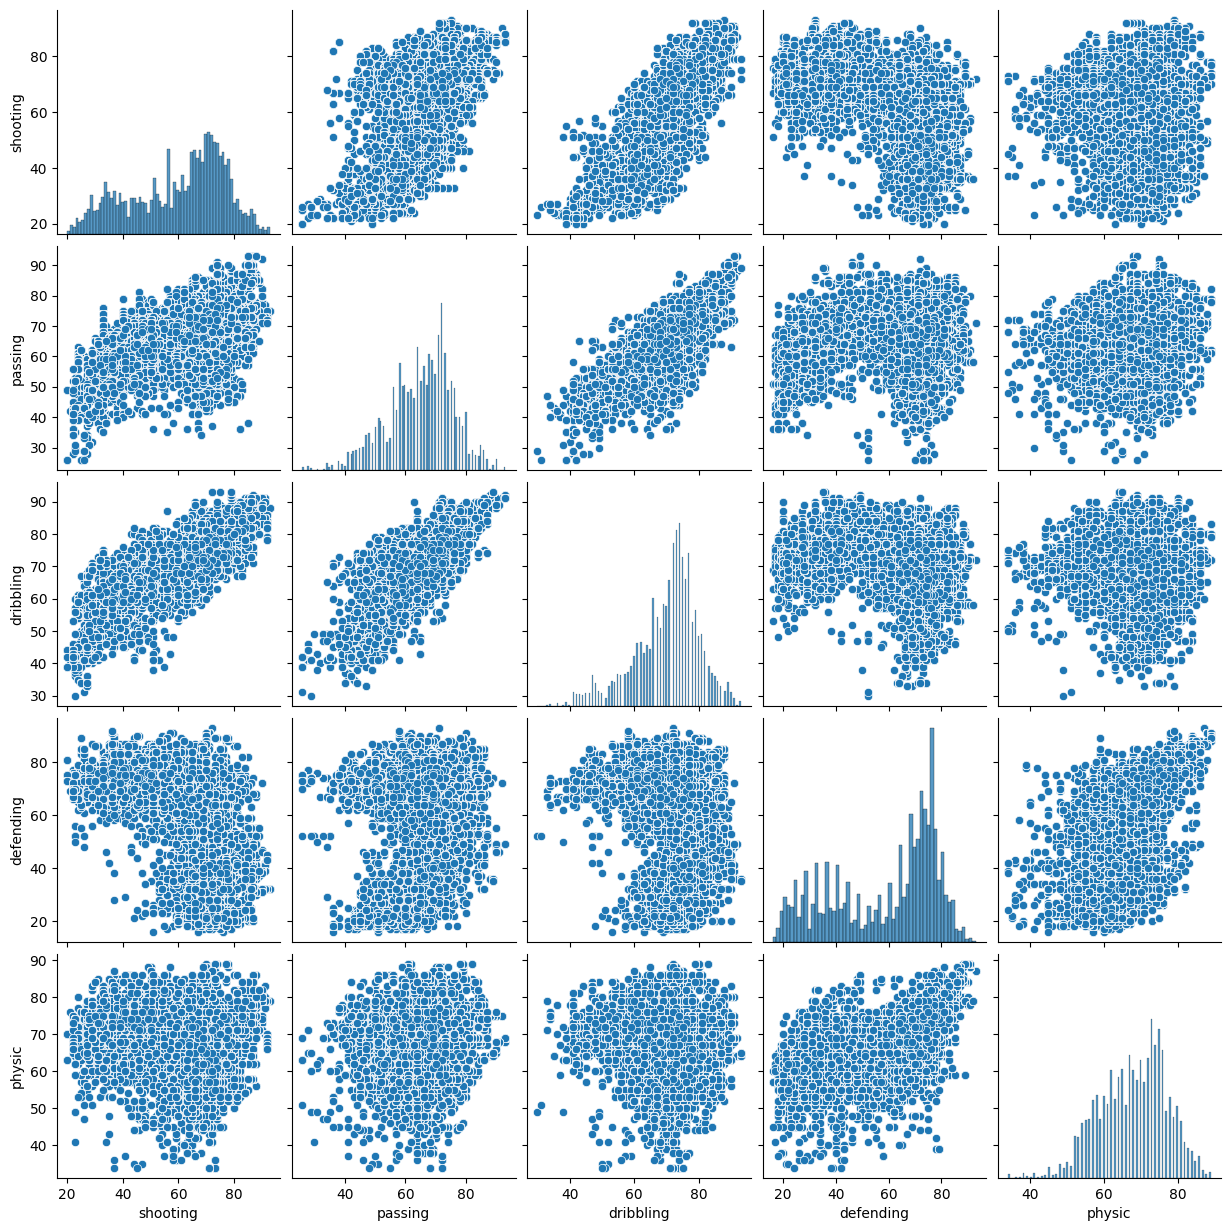

In [120]:
sns.pairplot(df_habilities[skills_ratings[0:5]])

En el siguiente paso, procedemos a realizar la clusterización de las jugadoras de FIFA 23 basándonos en sus habilidades. Antes de entrar en el proceso de clustering, comenzamos con una evaluación visual de las relaciones entre las diferentes variables numéricas utilizando pairplots. Estos gráficos nos permiten explorar las interacciones y patrones entre las habilidades de las jugadoras, lo que nos ayudará a comprender mejor la estructura de los datos antes de aplicar técnicas de agrupación. En la parte de arriba podremos ver los pairplots que utilizaremos como punto de partida para nuestro análisis de clustering.

#### 3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué?

No fue necesario normalizar los datos ya que todos están en una misma escala de 0 a 100. Lo que sí vamos a hacer en el siguiente paso es escalarlos utilizando el StandarScaler de sklearn. Esto no debería cambiar demasiado el resultado, pero puede servir ya que algunas de las características presentan valores más en el rango de los 40-100 mientras que otras recorren el rango 0-100 en su totalidad, por lo cual escalar los datos puede evitar que la diferencia de varianzas propia de los distintos rangos efectivos de valores afecte el peso que le da el algoritmo de clustering a cada característica. Además, por el carácter de los datos, sabemos que el escalado no nos va a hacer perder información (como sería el caso si estuviesemos trabajando por ejemplo con datos geográficos de longitud y latitud).

#### 4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 

In [121]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_skills2)

In [123]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

df_skills2['Cluster'] = kmeans.labels_



/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [124]:
df_clusters=df_skills2.copy()
df_clusters['kmeans_5'] = kmeans.labels_ #clusters
print('Kmeans encontró: ', max(kmeans.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)
print(df_skills2.columns)
clusters = kmeans.labels_
bool_crack=df_skills2["attacking_crossing"] > 85
bool_no_crack=df_skills2["attacking_crossing"]<86
#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad
Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'Cluster'],
      dtype='object')


In [125]:
kmean_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                           mode='markers',
                        text=df.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Ckacks!!',
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)



In [126]:
fig.show(renderer="colab")

In [127]:
df_skills2['Cluster']

0         3
1         0
3         3
4         0
5         0
         ..
181356    3
181357    2
181358    2
181359    3
181360    3
Name: Cluster, Length: 165315, dtype: int32

/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: F

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

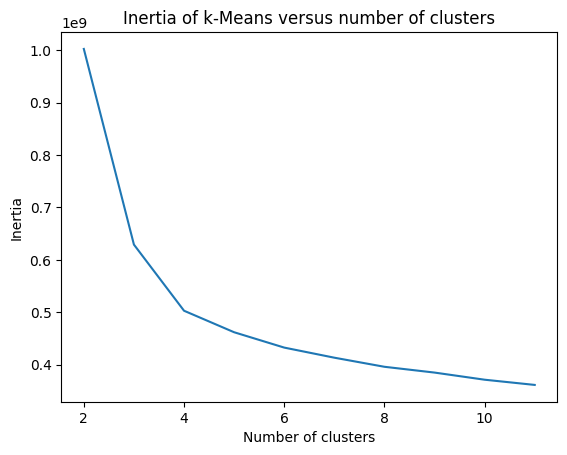

In [128]:
# Aqui calculamos la inercia: Distancia de todas las observaciones a los centro de todos los grupos

scores = [KMeans(n_clusters=i).fit(df_skills2).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

#### 5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?

#### **a) ¿Que hay en cada Cluster?**

Es un poco complejo ver que hay en cada Cluster, ya que tenemos una gran cantidad de variables de las habilidades del dataset. Las variables contienen valores numericos. En cada cluster hay agrupaciones de las habilidades de las jugadoras del dataset del juego FIFA, se distinguen los elementos semejantes entre si. Con esto podremos ver grupo de jugadoras con habilidades equivalentes.

#### **b) ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo?**

Si, podria decirse que pueden cumplir el mismo rol de un equipo, ya que depende de las agrupaciones de los clustering y las caracteristicas de las habilidades que estamos considerando. Puede haber jugadoras con habilidades equivalentes, esto se puede apreciar mirando los clusteres. A simple vista lo podemos ver y si hay.


#### **c) ¿Se trata de clusters heterogeneos?**

No, no son clusters heterogéneos, ya que las habilidades y sus valores numéricos difieren entre cada jugadora. No se observa una dispersión irregular en los puntos de los clusters presentados. Aunque existen variables complementarias, no se cumplen los criterios para considerar que los clusters son heterogéneos.

#### **d) ¿Por qué razón pueden haber sido agrupadas las jugadoras del cluster?**

Las agrupaciones se basaron en las habilidades de cada jugadora con el objetivo de asignar roles similares en un equipo. Aunque al no ser heterogeneos no responde a esta pregunta.

#### **e) ¿Que motiva las diferencias en tamaño?**

La diferencia en tamaño entre los clusters se debe a la forma en que se realizaron las agrupaciones. Aunque no contesta esta pregunta ya que no son heterogeneos.

#### 6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [129]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

/home/sudokux/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



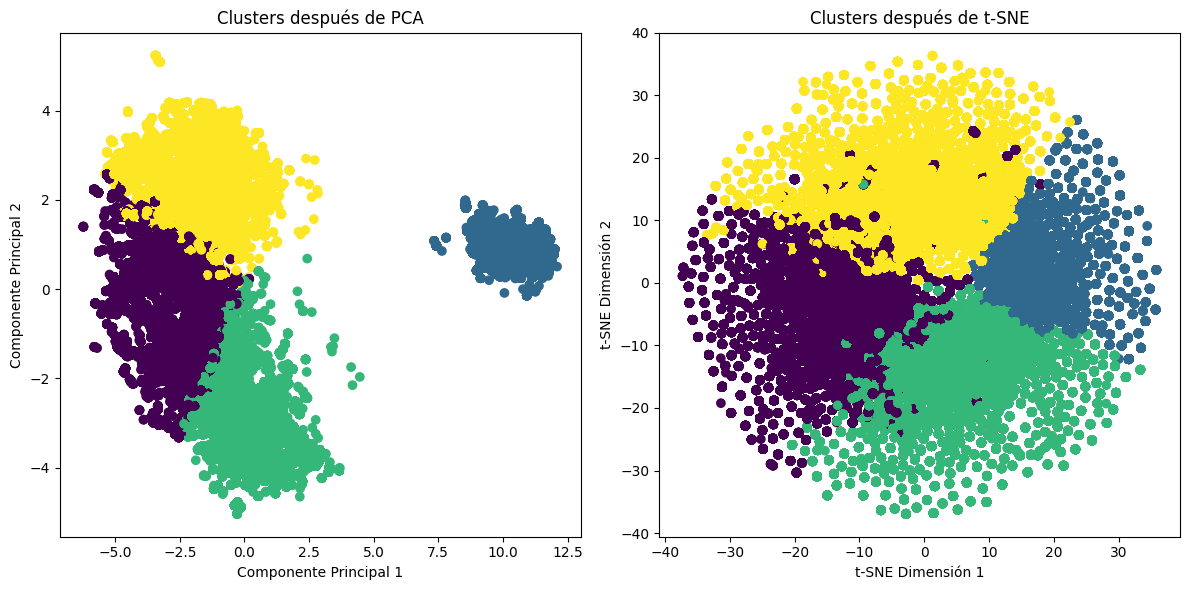

In [130]:
y_clusters = kmeans.fit_predict(X_scaled)
# Graficar los clusters después de la reducción de dimensionalidad
plt.figure(figsize=(12, 6))

# Gráfico PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clusters, cmap='viridis')
plt.title('Clusters después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_clusters, cmap='viridis')
plt.title('Clusters después de t-SNE')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')

plt.tight_layout()
plt.show()

Se utilizó **PCA** y **tSNE** para la visualización de los componentes en el conjunto de datos. Ambas técnicas trabajan reduciendo la dimensionalidad para poder observar similitudes entre los clusters generados por el modelo utilizado.


El análisis de los componentes principales **(PCA)** nos muestra los datos de acuerdo a la varianza, mientras que tSNE permite, mediante una distribución de gradiente, resaltar grupos de datos similares que pueden no ser evidentes en un espacio de mayor dime


A continuación emplearemos otro método de clustering, y más adelante compararemos los resultados.

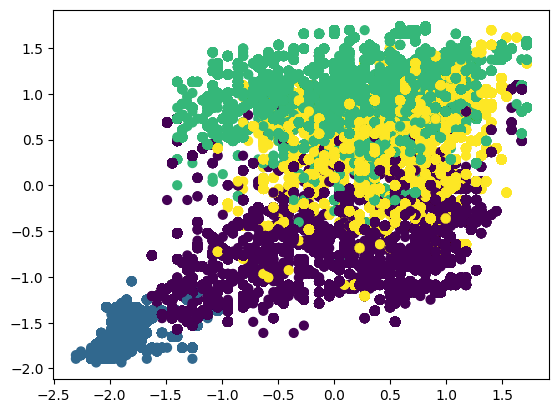

In [131]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X_scaled)
labels = gmm.predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=40, cmap='viridis');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac1b962f-e474-4edd-8864-c62fb2d2b6e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

Hacemos una función que tome los datos de la columna "player positions" y los convierta en una posición estándar que vamos a usar para evaluar nuestros algoritmos de clustering.
También creamos otra función que convierte las posiciones en números para poder pasarlo como parámetro de color para el scatterplot, también con la intención de compararlo con nuestros algoritmos de clustering.

In [132]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW'] #Delanteras
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF'] #Mediocampistas
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB'] #Defensoras
goalkeepers=['GK'] #Arqueras

def pos3(positions):
    for x in positions.split(","):
        if x in forwards:
            return 'Forward'

        elif x in midfielders:
            return 'Midfielder'

        elif x in defenders:
            return 'Defender'

        elif x in goalkeepers:
            return 'GK'

        else:
            return 'nan'
    
#Guardamos la posición en nuestro dataset
df_skills2["posicionposta"]=df["player_positions"].apply(lambda x: pos3(x))

def pos2num(position):
    if position == 'Forward':
        return 0

    elif position == 'Midfielder':
        return 1

    elif position == 'Defender':
        return 2

    elif position == 'GK':
        return 3

    else:
        return 'nan'
    


En el siguiente gráfico podemos ver en la primera y tercera fila una visualización de los clusterings realizados con los métodos de Gaussian Mixture y K-means respectivamente, mientras que en la fila del medio vemos los datos reales de las posiciones de las jugadoras tomados directamente del dataset con los métodos mencionados más arriba.
Esta visualización nos permite por un lado terminar de confimar y comprender por qué la cantidad de clusters óptima era 4, ya que coincide con las 4 posiciones principales de un equipo de fútbol; y por otro lado evaluar gráficamente nuestros modelos. 
Según lo que podemos observar en los gráficos mencionados, el método de Gaussian Mix parece haber funcionado mejor en este caso.

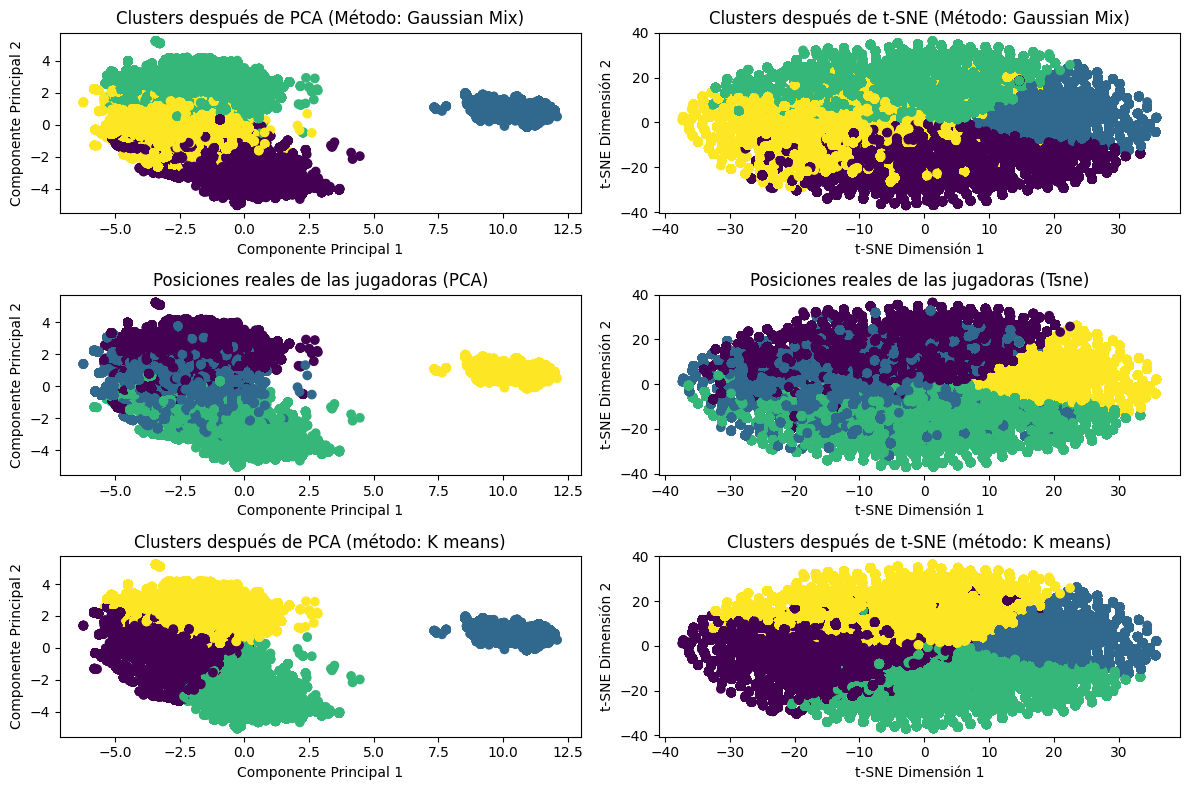

In [133]:

y_clusters2 = gmm.predict(X_scaled)

# Graficar los clusters después de la reducción de dimensionalidad
plt.figure(figsize=(12, 8))
# Gráfico PCA
plt.subplot(3, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clusters2, cmap='viridis')
plt.title('Clusters después de PCA (Método: Gaussian Mix)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico t-SNE
plt.subplot(3, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_clusters2, cmap='viridis')
plt.title('Clusters después de t-SNE (Método: Gaussian Mix)')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')


# Gráfico Posiciones reales de las jugadoras (con PCA para visualización)
plt.subplot(3, 2, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_skills2["posicionposta"].apply(lambda x:pos2num(x)).to_numpy(), cmap='viridis')
plt.title('Posiciones reales de las jugadoras (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico Posiciones reales de las jugadoras (con Tsne para visualización)
plt.subplot(3, 2, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_skills2["posicionposta"].apply(lambda x:pos2num(x)).to_numpy(), cmap='viridis')
plt.title('Posiciones reales de las jugadoras (Tsne)')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')

# Gráfico PCA (K means)
plt.subplot(3, 2, 5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clusters, cmap='viridis')
plt.title('Clusters después de PCA (método: K means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico t-SNE
plt.subplot(3, 2, 6)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_clusters, cmap='viridis')
plt.title('Clusters después de t-SNE (método: K means)')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')

plt.tight_layout()
plt.show()


In [97]:
kmeanscluster=pd.DataFrame(y_clusters)
Clustering_Fulop= pd.DataFrame(y_clusters2)
Posiciones=df_skills2["posicionposta"].apply(lambda x:pos2num(x))

total=len(Clustering_Fulop)
#Acá comparamos los porcentajes de jugadoras en cada cluster según cada algoritmo y según las verdaderas posiciones.
#Esta implementación depende un poco de que los clusters correspondientes de cada algoritmo tengan la misma distribución 
#en cuanto a cantidades, pero se puede chequear manualmente que en este caso efectivamente coinciden
lista=[kmeanscluster,Clustering_Fulop,Posiciones]
for i in lista:
    for j, valor in enumerate (i.value_counts().sort_values()):
        print (f"El cluster (o posición) {j} tiene el {valor*100/total:.2f}% de las jugadoras")
    print ("_________________")




El cluster (o posición) 0 tiene el 13.75% de las jugadoras
El cluster (o posición) 1 tiene el 26.20% de las jugadoras
El cluster (o posición) 2 tiene el 28.85% de las jugadoras
El cluster (o posición) 3 tiene el 31.20% de las jugadoras
_________________
El cluster (o posición) 0 tiene el 13.75% de las jugadoras
El cluster (o posición) 1 tiene el 25.67% de las jugadoras
El cluster (o posición) 2 tiene el 29.36% de las jugadoras
El cluster (o posición) 3 tiene el 31.21% de las jugadoras
_________________
El cluster (o posición) 0 tiene el 13.75% de las jugadoras
El cluster (o posición) 1 tiene el 22.99% de las jugadoras
El cluster (o posición) 2 tiene el 30.50% de las jugadoras
El cluster (o posición) 3 tiene el 32.76% de las jugadoras
_________________


Además del análisis visual que llevamos a cabo, al comparar el porcentaje de jugadoras en cada cluster con el porcentaje de jugadoras en cada posición vemos que dichos clusters coinciden de manera bastante precisa con las posiciones reales.